In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd code/
from main import main
from metrics import *
from visualize import *
%cd ..

C:\Users\jackj\school\fall2024\orie4580\gender-bias-analysis\code



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

C:\Users\jackj\school\fall2024\orie4580\gender-bias-analysis


In [2]:
def visualize_path_percentage(path, identities, num_levels):
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]
    
    # Prepare data for plotting percentages
    percentages = {identity: [] for identity in identities}
    for state in states:
        total_employees = sum(
            sum(state.get_count(level, identity) for identity in identities) for level in range(num_levels)
        )
        for identity in identities:
            total_identity_count = sum(state.get_count(level, identity) for level in range(num_levels))
            percentages[identity].append(total_identity_count / total_employees)
    
    # Prepare cumulative percentages for filling
    cumulative_percentages = np.zeros(len(times))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    for identity in identities:
        identity_percentages = np.array(percentages[identity])
        plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
        plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
        cumulative_percentages += identity_percentages
    
    plt.xlim(0, times[-1])
    plt.ylim(0, 1)
    
    # Add labels and legend
    plt.xlabel("Time")
    plt.ylabel("Percentage of Employees")
    plt.title("Overall Employee Identity Distribution Over Time")
    plt.legend(title="Identities", loc="upper right")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

def visualize_path_percentage_by_level(path, identities, num_levels):
    """
    Visualizes the state throughout the path as a step graph with filled regions
    for each level individually.

    Parameters:
        path (list of tuples): A list where each element is a tuple (time, state),
                               with state being a SimpleWorkplaceState.
        identities (list): List of identities (e.g., ["F", "M"]).
        levels (list): List of levels (e.g., ["0", "1", "2"]).
    """
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]  # Each state is a SimpleWorkplaceState
    
    # Create a plot for each level
    for level in range(num_levels):
        # Prepare data for plotting percentages at the current level
        percentages = {identity: [] for identity in identities}
        for state in states:
            total_employees_at_level = sum(state.get_count(level, identity) for identity in identities)
            for identity in identities:
                identity_count = state.get_count(level, identity)
                if total_employees_at_level > 0:
                    percentages[identity].append(identity_count / total_employees_at_level)
                else:
                    percentages[identity].append(0)  # Avoid division by zero
        
        # Prepare cumulative percentages for filling
        cumulative_percentages = np.zeros(len(times))
        
        # Create the plot for this level
        plt.figure(figsize=(12, 8))
        for identity in identities:
            identity_percentages = np.array(percentages[identity])
            plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
            plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
            cumulative_percentages += identity_percentages
        
        # Customize the plot for this level
        plt.xlim(0, times[-1])
        plt.ylim(0, 1)
        plt.xlabel("Time")
        plt.ylabel("Percentage of Employees")
        plt.title(f"Employee Identity Distribution Over Time at Level {level}")
        plt.legend(title="Identities", loc="upper right")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.tight_layout()
        plt.show()


In [3]:
path, model = main(1000)

Simulation time: 10.23
Simulation time: 21.12
Simulation time: 31.16
Simulation time: 41.20
Simulation time: 51.61
Simulation time: 61.87
Simulation time: 72.03
Simulation time: 83.08
Simulation time: 93.30
Simulation time: 104.32
Simulation time: 114.55
Simulation time: 124.98
Simulation time: 135.88
Simulation time: 146.17
Simulation time: 156.80
Simulation time: 166.89
Simulation time: 177.19
Simulation time: 187.66
Simulation time: 197.83
Simulation time: 207.90
Simulation time: 219.35
Simulation time: 230.04
Simulation time: 241.07
Simulation time: 252.01
Simulation time: 262.32
Simulation time: 272.36
Simulation time: 282.38
Simulation time: 293.76
Simulation time: 305.40
Simulation time: 316.76
Simulation time: 326.90
Simulation time: 337.10
Simulation time: 347.79
Simulation time: 359.12
Simulation time: 370.83
Simulation time: 382.89
Simulation time: 393.46
Simulation time: 404.69
Simulation time: 414.88
Simulation time: 424.90
Simulation time: 434.93
Simulation time: 445.74
S

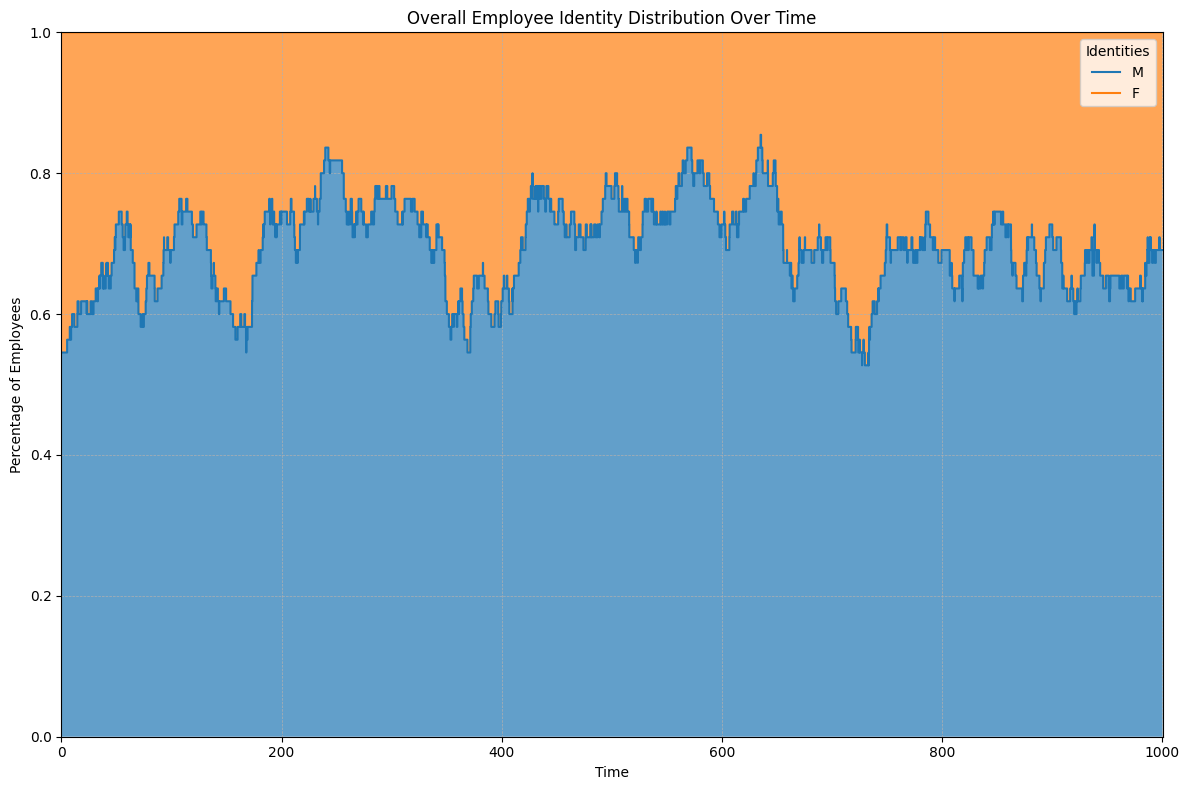

In [4]:
identities=["M", "F"]
num_levels=4
visualize_path_percentage(path, identities, num_levels)

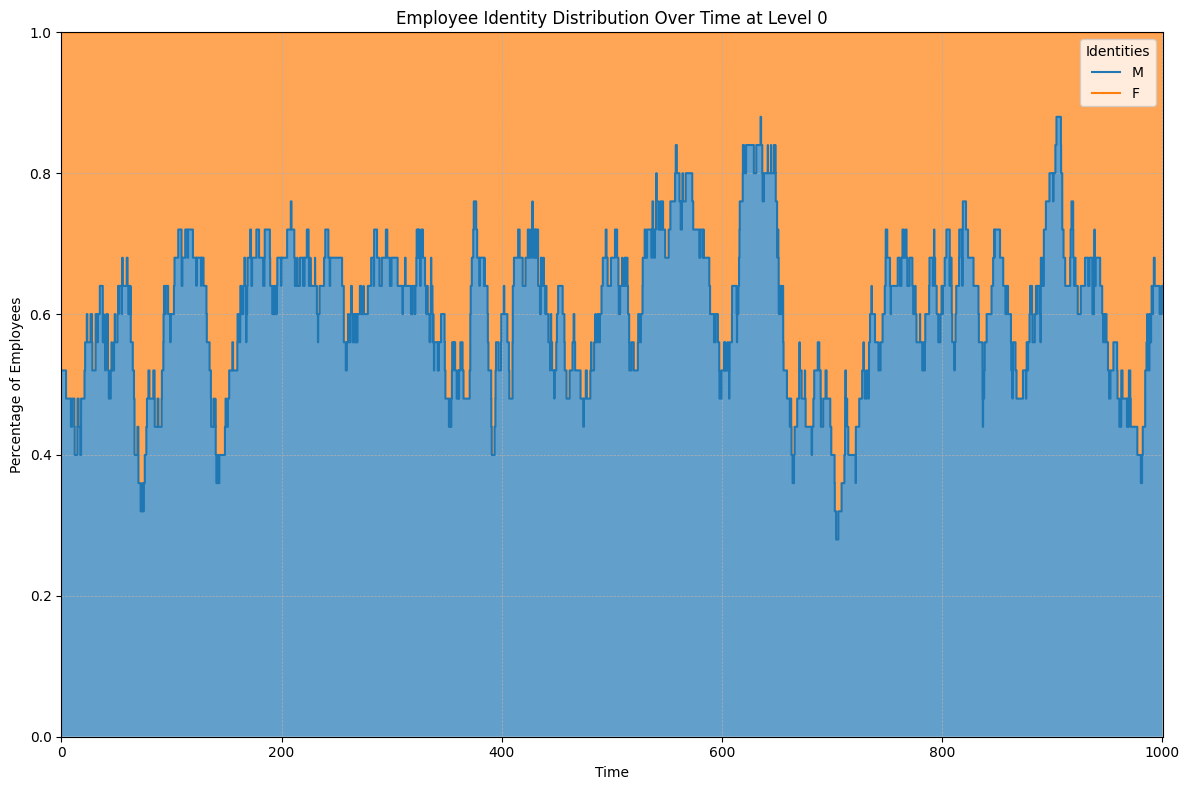

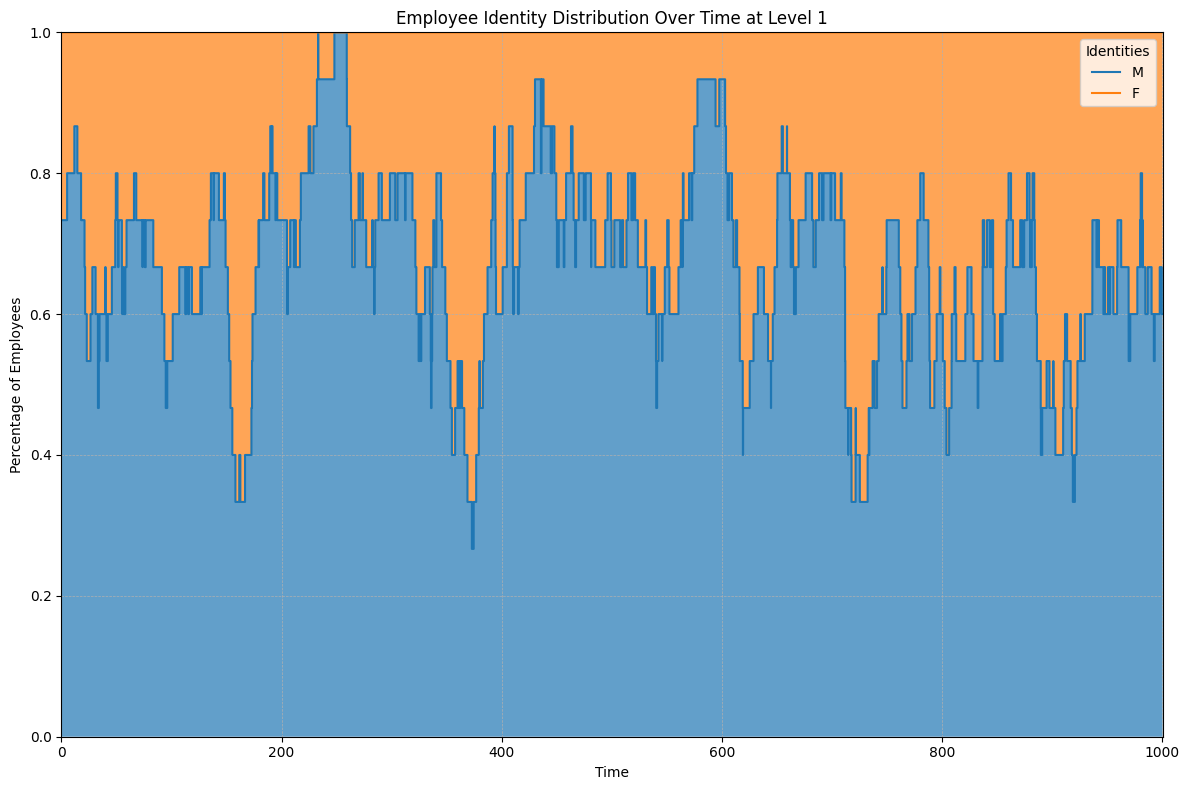

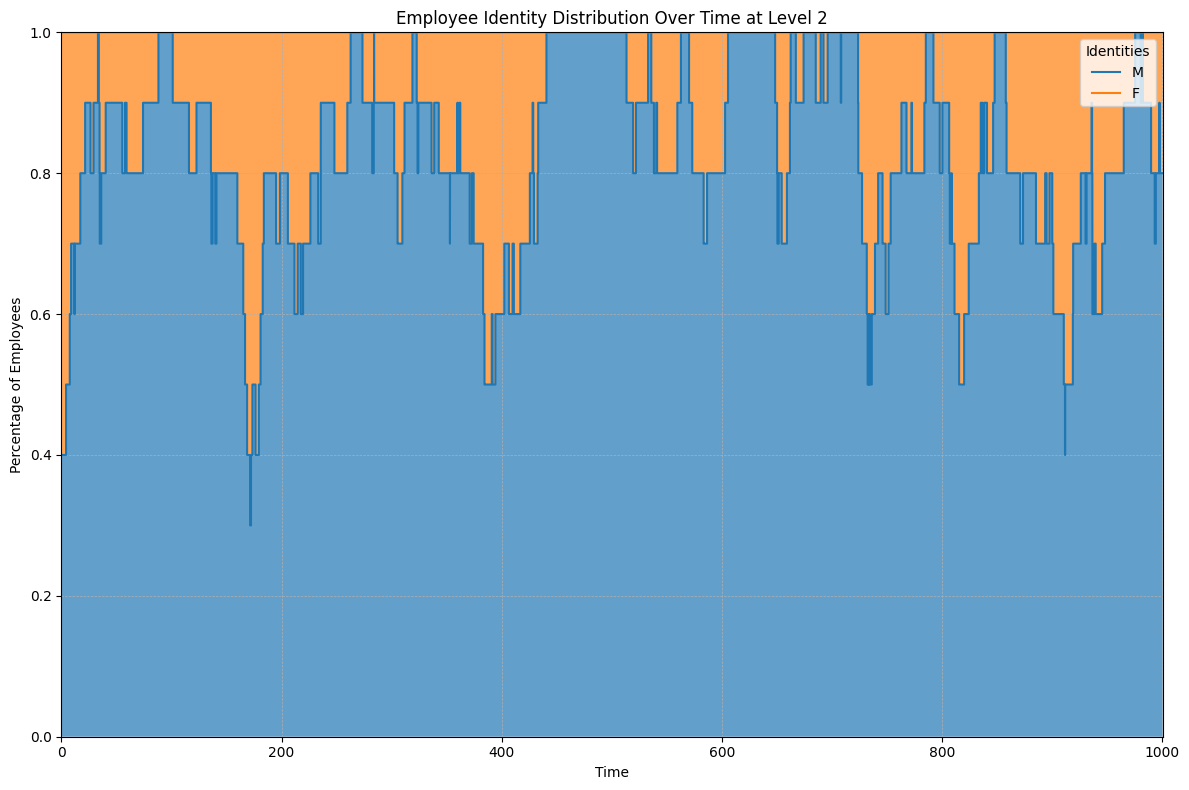

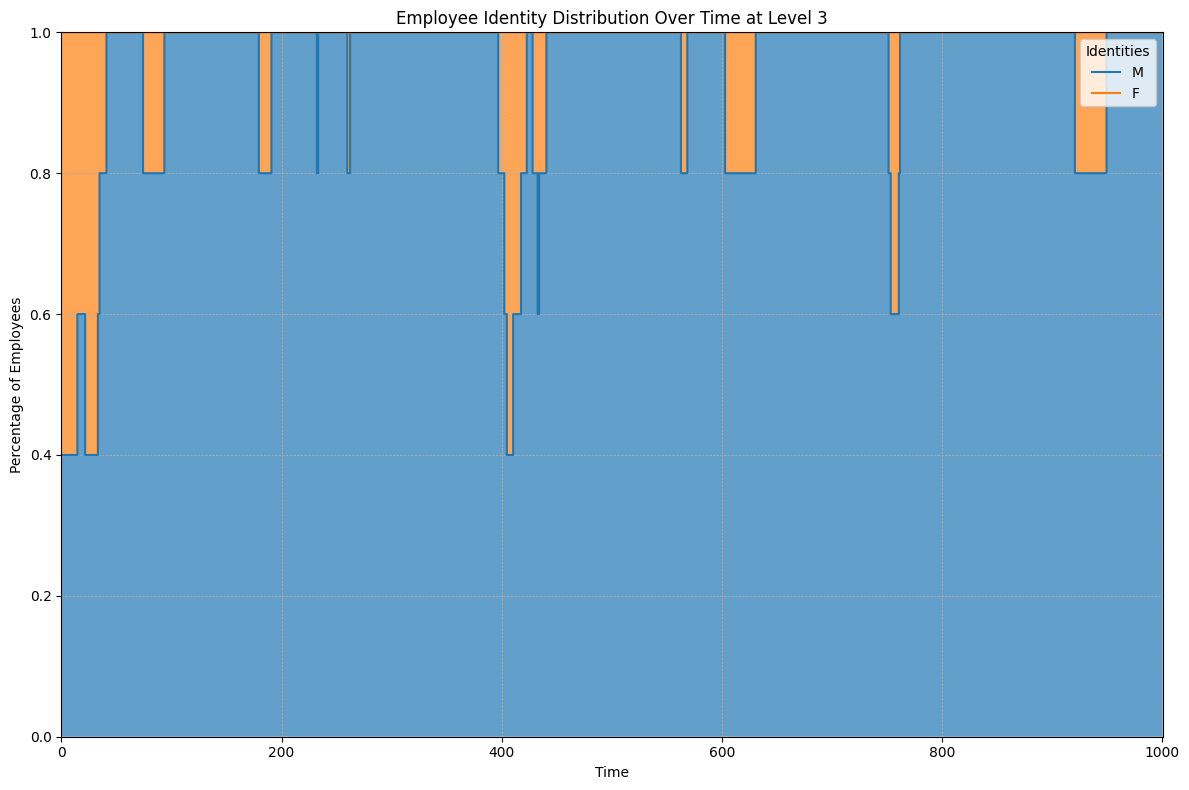

In [5]:
visualize_path_percentage_by_level(path, identities, num_levels)

In [6]:
counts = {'M' : 0, 'F' : 0}
for event_type, time, event_details, rate_details in model.log:
    print(rate_details)
    if len(event_details) > 0:
        identity = event_details[-1][0].identity
        counts[identity] += 1
print(counts, counts['M'] / (counts['M'] + counts['F']))

(0.37197648713524295, 0.13790707761370907, 0.55, 0.1875)
(0.39965038328588315, 0.167475989050118, 0.55, 0.1875)
(0.4858809381025885, 0.23460985395941983, 0.55, 0.1875)
(0.5120261714972567, 0.25781688737431685, 0.55, 0.18)
(0.5119038751153725, 0.2504339744075414, 0.55, 0.1725)
(0.520627878466194, 0.27400165630058404, 0.55, 0.18)
(0.5198550396392075, 0.27153678406978676, 0.55, 0.1725)
(0.5233914706862528, 0.3126733916694602, 0.55, 0.16499999999999998)
(0.5203587794106754, 0.3156436515088519, 0.55, 0.16499999999999998)
(0.5178110871947111, 0.32035003620467617, 0.55, 0.1725)
(0.5197986855522114, 0.33075955625452835, 0.55, 0.1725)
(0.5227008762722337, 0.35273678742105685, 0.55, 0.1725)
(0.5191974898686513, 0.3562550089411127, 0.55, 0.1725)
(0.5150979769554351, 0.3268142863628816, 0.55, 0.16499999999999998)
(0.5146347995306241, 0.3462229845746058, 0.55, 0.16499999999999998)
(0.5202534218112692, 0.3864555135935207, 0.55, 0.1575)
(0.5183049000306318, 0.4039082161276332, 0.55, 0.164999999999999

In [7]:
for employee in path[-1][1].employees:
    print(employee.identity, employee.bias_score)

M 0.033452633334314086
F 0.07572653591965978
M 0.023008816354599275
M 0.028146797823827487
M 0.016964629135378523
M 0.01628460240100802
M 0.02397723501296991
F 0.03868785144082051
F 0.035285113224412856
M 0.012422276020285849
F 0.020103049567761846
M 0.013212131981880811
M 0.008865814252779096
F 0.035582052893864104
F 0.02437283110411553
M 0.004695912824733079
F 0.018228853760388932
M 0.0074272075857721625
M 0.01161238321385353
M 0.005715284611118603
M 0.00505890258791241
M 0.005663740417576086
M 0.0024212632972500686
F 0.014851431828458973
F 0.009022461682416083
M 0.001976535901619059
F 0.007857181839680193
M 0.0017507869400181836
M 0.001723279057544333
M 0.0016815910972619488
F 0.007035371738103059
F 0.010121832032884715
M 0.0024731369677934937
M 0.0014995805739724927
M 0.0014628123439529557
M 0.002317944112663592
F 0.005511402029508713
M 0.0013384471790059888
F 0.005249619979988034
M 0.0012552968495197566
F 0.004748830993961895
M 0.0011035466840867091
M 0.002549797929851481
M 0.0016

In [8]:
identities = ["M", "F"]
general_population_percentages = { "M": 0.6, "F": 0.4}

metrics = calculate_metrics_over_path(path, identities, general_population_percentages)

Plot saved to plots/naive_biases_company.png


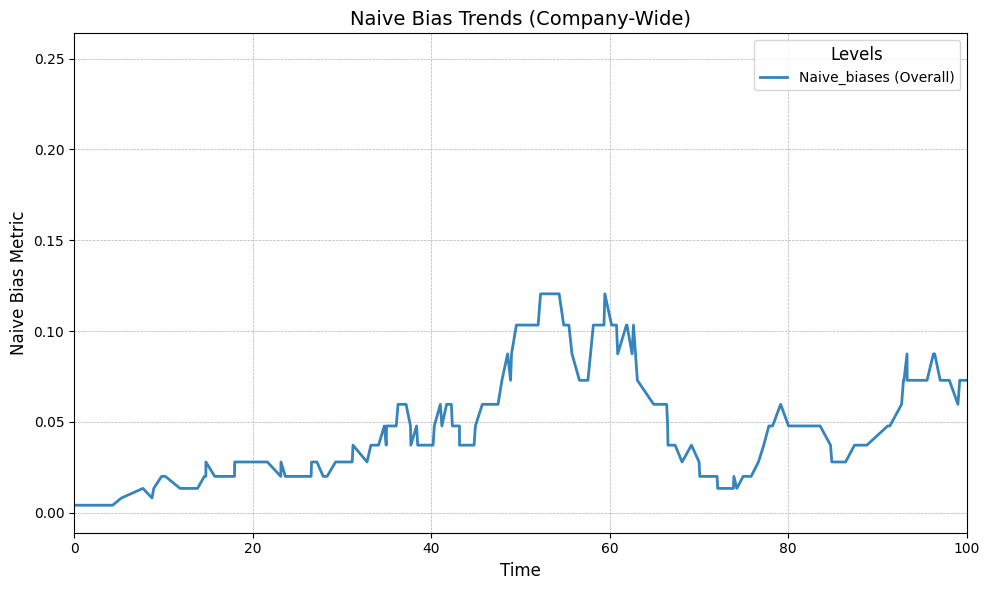

In [9]:
plot_metric(
    metrics=metrics,
    metric_name="naive_biases",
    title="Naive Bias Trends (Company-Wide)",
    xlabel="Time",
    ylabel="Naive Bias Metric",
    max_time=100,
    save_path="plots/naive_biases_company.png"
)

Plot saved to plots/performances_levels_0_1_2.png


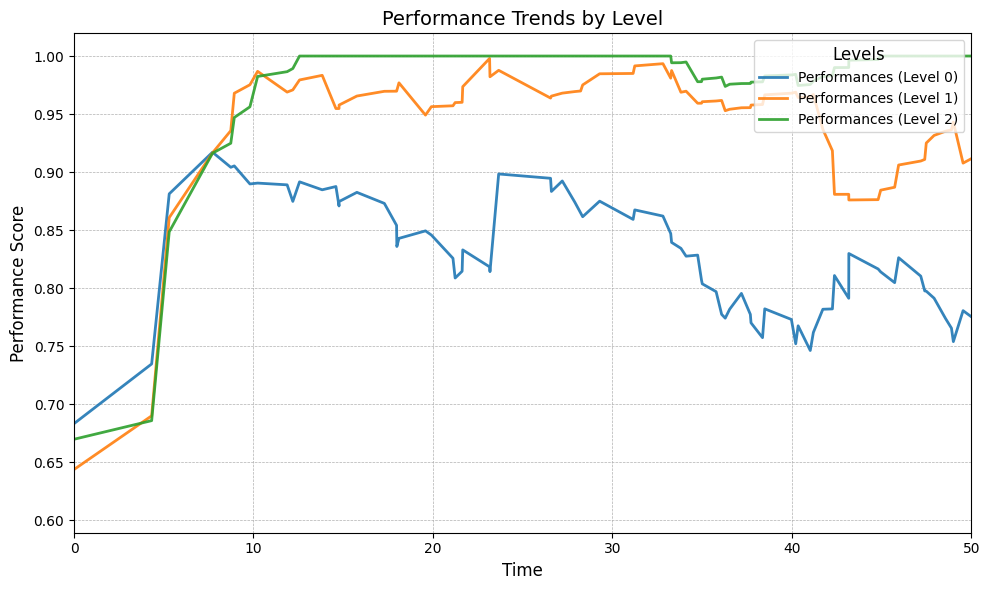

In [10]:
plot_metric(
    metrics=metrics,
    metric_name="performances",
    levels=[0, 1, 2],
    title="Performance Trends by Level",
    xlabel="Time",
    ylabel="Performance Score",
    max_time=50,
    save_path="plots/performances_levels_0_1_2.png"
)

In [11]:
identities = ["M", "F"]
identity_percentages_path = calculate_identity_percentages_over_path(path, identities)

Plot saved to plots/identity_percentages_company.png


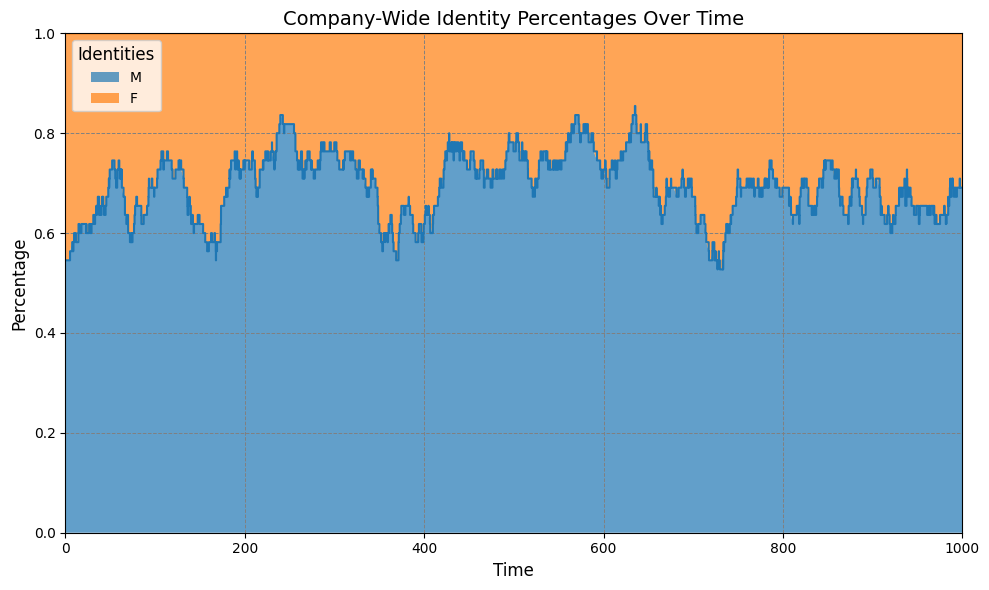

In [12]:
plot_identity_percentages(
    percentages=identity_percentages_path["percentages"],
    timestamps=identity_percentages_path["timestamps"],
    identities=identities,
    population_percentages={"M": 0.6, "F": 0.4},
    title="Company-Wide Identity Percentages Over Time",
    save_path="plots/identity_percentages_company.png"
)

Plot saved to plots/identity_percentages_level_0.png


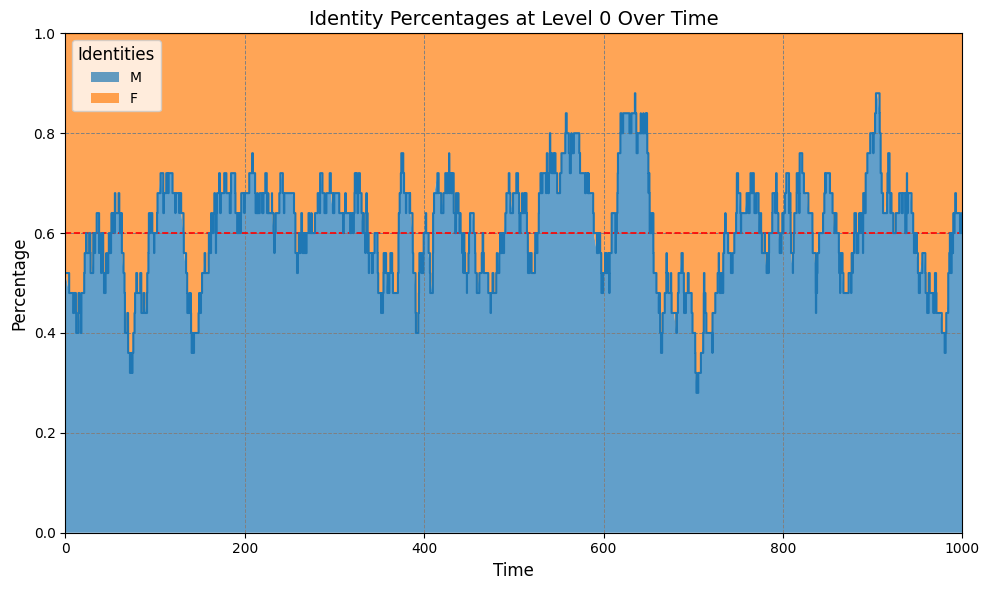

In [13]:
plot_identity_percentages(
    percentages=identity_percentages_path["percentages"],
    timestamps=identity_percentages_path["timestamps"],
    identities=identities,
    level=0,
    population_percentages={"M": 0.6, "F": 0.4},
    title="Identity Percentages at Level 0 Over Time",
    save_path="plots/identity_percentages_level_0.png"
)